In [1]:
import tensorflow as tf
keras = tf.keras
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
%run ../src/acc_df.py
Ac = Acc_data('../data/cleaned/coll_coord.csv')
acc = Ac.get_all_coll() #['']

### 1. Turn it into a time series of weeks

In [3]:
acc_04_18 = acc[(acc['year'] != 2019) & (acc['year'] != 2003 )]
acc_w = acc_04_18[['year','week','OBJECTID']].groupby(['year','week']).count()

In [4]:
week_numbers = acc_w.reset_index()
week_numbers.rename({'OBJECTID': 'acc_nr'}, axis=1, inplace=True)

In [5]:
# week_numbers.index.values

In [6]:
week_numbers.tail(2)

,year,week,acc_nr
784,2018,51,234
785,2018,52,150


In [7]:
acc_nr_bw = week_numbers.acc_nr.values #[:100]

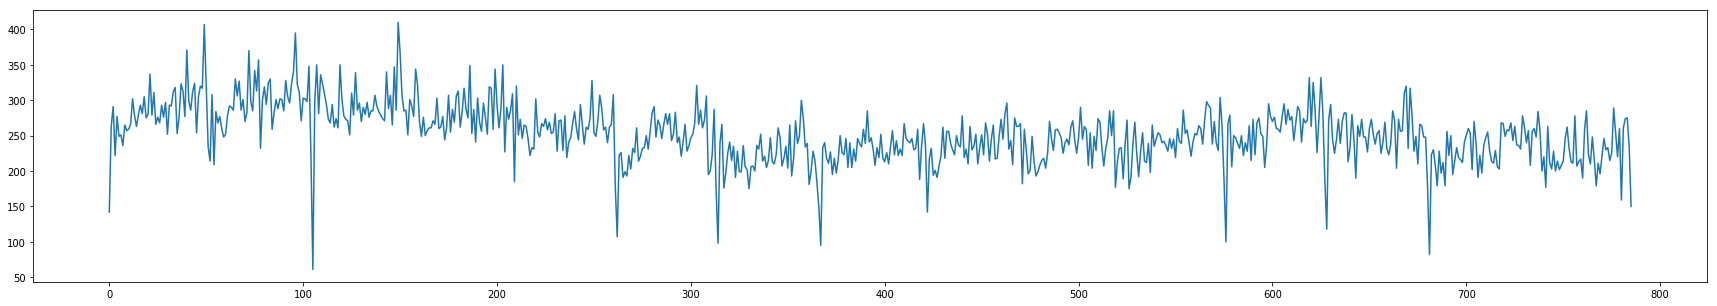

In [8]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(week_numbers.index.values, acc_nr_bw)

#### Windowize and split

In [9]:
def windowize_data(data, n_prev):
    n_predictions = len(data) - n_prev
    y = data[n_prev:]
    # this might be too clever
    indices = np.arange(n_prev) + np.arange(n_predictions)[:, None]
    x = data[indices, None]
    return x, y

In [10]:
# windowize_data(week_numbers.index.values,20)

In [11]:
def split_and_windowize(data, n_prev, fraction_test=0.3):
    n_predictions = len(data) - 2*n_prev
    
    n_test  = int(fraction_test * n_predictions)
    n_train = n_predictions - n_test   
    
    x_train, y_train = windowize_data(data[:n_train], n_prev)
    x_test, y_test = windowize_data(data[n_train:], n_prev)
    return x_train, x_test, y_train, y_test

In [12]:
n_prev = 100
x_train, x_test, y_train, y_test = split_and_windowize(acc_nr_bw,n_prev,fraction_test=0.1)

#### Model

In [13]:
model = keras.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.LSTM(32, return_sequences=False))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',
              loss='mean_squared_error')

### Train

In [14]:
model.fit(x_train, y_train, batch_size=32, epochs=1000)

Train on 428 samples
Epoch 1/1000
428/428 [==============================] - 5s 12ms/sample - loss: 62961.4361
Epoch 2/1000
428/428 [==============================] - 2s 4ms/sample - loss: 61501.2578
Epoch 3/1000
428/428 [==============================] - 2s 5ms/sample - loss: 60776.2757
Epoch 4/1000
428/428 [==============================] - 2s 5ms/sample - loss: 60329.7917
Epoch 5/1000
428/428 [==============================] - 2s 5ms/sample - loss: 60003.4167
Epoch 6/1000
428/428 [==============================] - 2s 5ms/sample - loss: 59727.7879
Epoch 7/1000
428/428 [==============================] - 2s 5ms/sample - loss: 59477.1613
Epoch 8/1000
428/428 [==============================] - 2s 5ms/sample - loss: 59238.3060
Epoch 9/1000
428/428 [==============================] - 2s 5ms/sample - loss: 59006.3752
Epoch 10/1000
428/428 [==============================] - 2s 6ms/sample - loss: 58778.8162
Epoch 11/1000
428/428 [==============================] - 2s 6ms/sample - loss: 58554.87

In [15]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[249.81139],
       [249.81139],
       [249.81139],
       [249.81139],
       [249.81139]], dtype=float32)

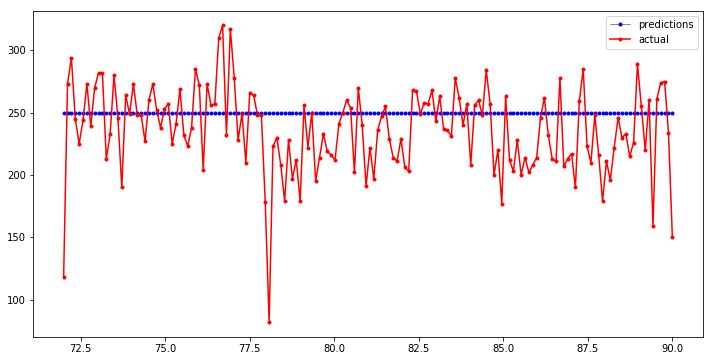

In [16]:
n_pts = len(acc_nr_bw)
t = np.linspace(0, 15 * 6, n_pts)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t[-len(y_test):], y_pred, 'b.-', label='predictions', lw=0.5)
ax.plot(t[-len(y_test):], y_test, 'r.-', label='actual')
ax.legend()

In [31]:
model = keras.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, return_sequences=False))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=32, epochs=3000)

Train on 428 samples
Epoch 1/3000
428/428 [==============================] - 5s 12ms/sample - loss: 62740.7807
Epoch 2/3000
428/428 [==============================] - 2s 4ms/sample - loss: 61321.6358
Epoch 3/3000
428/428 [==============================] - 2s 4ms/sample - loss: 60742.7608
Epoch 4/3000
428/428 [==============================] - 2s 4ms/sample - loss: 60365.8551
Epoch 5/3000
428/428 [==============================] - 2s 4ms/sample - loss: 60067.7921
Epoch 6/3000
428/428 [==============================] - 2s 4ms/sample - loss: 59804.6591
Epoch 7/3000
428/428 [==============================] - 2s 4ms/sample - loss: 59558.9218
Epoch 8/3000
428/428 [==============================] - 2s 4ms/sample - loss: 59322.9635
Epoch 9/3000
428/428 [==============================] - 2s 4ms/sample - loss: 59094.3718
Epoch 10/3000
428/428 [==============================] - 2s 4ms/sample - loss: 58868.9608
Epoch 11/3000
428/428 [==============================] - 2s 4ms/sample - loss: 58645.55

In [33]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[305.8294 ],
       [259.43002],
       [234.4162 ],
       [242.68918],
       [226.64563]], dtype=float32)

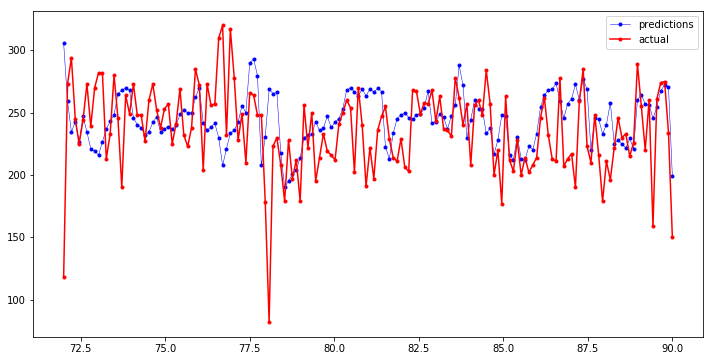

In [34]:
n_pts = len(acc_nr_bw)
t = np.linspace(0, 15 * 6, n_pts)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t[-len(y_test):], y_pred, 'b.-', label='predictions', lw=0.5)
ax.plot(t[-len(y_test):], y_test, 'r.-', label='actual')
ax.legend()

In [22]:
model.loss

'mean_squared_error'

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(epochs=[10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='neg_mean_squared_error',)
grid_result = grid.fit(acc_nr_bw, n_prev)

TypeError: Singleton array array(100) cannot be considered a valid collection.

In [29]:
import sklearn 
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']